# Likelihood versus Probability

In [1]:
# Using PythonDataS2022 conda environment

In [2]:
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as sc

In [3]:
# ppf() is equivalent to a 'One-tail test' on the density plot
alpha = 0.05
alpha_one_tail = alpha
alpha_two_tail = alpha/2

# ppf - percent point function (inverse of cdf)
# input percent area and returns standard deviation (x value)
x_deviation = sc.norm.ppf(1- alpha_two_tail)
print(f'The standard deviation of a two tail test at an alpha of {alpha} \
is {round(x_deviation,3)} standard deviations')

The standard deviation of a two tail test at an alpha of 0.05 is 1.96 standard deviations


In [4]:
# the likelihood value
likelihood = sc.norm.pdf(x_deviation)
print(f"The likelihood of an alpha value of {alpha} is {round(likelihood,3)}")

The likelihood of an alpha value of 0.05 is 0.058


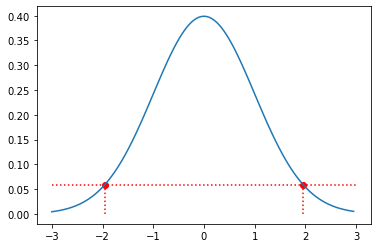

In [5]:
# Here is a visual of the normal distribution
density_function=[]
std_dev= np.arange(-3,3, 0.05)
for i in std_dev:
    density_function.append(sc.norm.pdf(i))
    
plt.plot(std_dev, density_function)

plt.vlines(x_deviation, 0, sc.norm.pdf(x_deviation), color="r", linestyle="dotted")
plt.scatter(x_deviation, sc.norm.pdf(x_deviation), color="r")

plt.vlines(sc.norm.ppf(alpha_two_tail), 0, sc.norm.pdf(sc.norm.ppf(alpha_two_tail)), color="r", linestyle="dotted")
plt.scatter(sc.norm.ppf(alpha_two_tail), sc.norm.pdf(sc.norm.ppf(alpha_two_tail)), color="r")

plt.hlines(likelihood,-3,3, color='r', linestyle="dotted")

In the plot above the red dot is at ~1.96 standard deviations at the 0.05 alpha level and has a likelihood of ~0.058.

In [6]:
# The probability is the area in the tails of the distribution.
probability = sc.norm.cdf(x_deviation)
print(f"The two tail probability at an alpha of {alpha} is {round(1-probability,3)} for each tail")

The two tail probability at an alpha of 0.05 is 0.025 for each tail


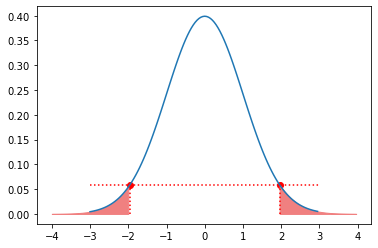

In [13]:
# Here is a visual of the normal distribution

fig, ax = plt.subplots()

density_function=[]
std_dev= np.arange(-3,3, 0.05)
for i in std_dev:
    density_function.append(sc.norm.pdf(i))
    
ax.plot(std_dev, density_function)

ax.vlines(x_deviation, 0, sc.norm.pdf(x_deviation), color="r", linestyle="dotted")
ax.scatter(x_deviation, sc.norm.pdf(x_deviation), color="r")

ax.vlines(sc.norm.ppf(alpha_two_tail), 0, sc.norm.pdf(sc.norm.ppf(alpha_two_tail)), color="r", linestyle="dotted")
ax.scatter(sc.norm.ppf(alpha_two_tail), sc.norm.pdf(sc.norm.ppf(alpha_two_tail)), color="r")

ax.hlines(likelihood,-3,3, color='r', linestyle="dotted")

mean=0
std=1
iq=sc.norm(mean,std)
pr=np.arange(x_deviation, 4, 0.1)
ax.fill_between(pr,iq.pdf(pr),color='lightcoral')
pl=np.arange(-4, -x_deviation, 0.1)
ax.fill_between(pl,iq.pdf(pl),color='lightcoral')

The red dots indicate the likelihood of 0.058  
The light red area is the probability of 0.05 combined for each tail

In [14]:
from datetime import datetime
import random
fig.savefig(f'./images/likelihood_probability_{datetime.today().strftime("%Y_%m_%d")}_{random.randint(10, 99)}')